# Statistics & Public Health 2: Data Analysis

**Table of contents**<a id='toc0_'></a>    
- [Introduction](#toc1_)    
- [Library Setup](#toc2_)    
- [Part 1-BASIC Analysis](#toc3_)    
  - [1.1- Convert the WNV Present column into a binary column and create dummy variables from the Trap type column. ](#toc3_1_)    
  - [1.2- What is the average number of mosquitoes for each month? What trends do you notice?](#toc3_2_)     
- [Part 2-Statistical Analysis](#toc4_)    
  - [2.1- Is there a statistically significant difference between the different mosquito species when looking at the occurrence of West Nile Virus?](#toc4_1_)    
  - [2.2- Which columns are positively correlated with the number of mosquitoes caught? Which columns are negatively correlated? Are these correlations statistically significant?](#toc4_2_)    
  
- [Part 3- Advanced Statistical Analysis](#toc5_)    
  - [3.1- Run a linear regression to determine how the independent variables affect the number of mosquitoes caught. Explain your model construction process. Analyze the model and the results and discuss the model's limitations. This may end up being an iterative process](#toc5_1)
    
    [Note:
    -You will likely see a low R^2 value, that is to be expected.
    -This dataset does not respond well to performing VIF analysis, so this is not required.
    -WNV Present must not be one of your independent variables.Data Loading](#toc5_2_)  
    
  - [3.2- Run a logistic regression to determine how the independent variables affect West Nile Virus presence. Explain your model construction process. Analyze the model and the results and discuss the model's limitations. This may end up being an iterative process. Note: Mosquito number should be one of your independent variables](#toc5_3_)       
   

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=3
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>Introduction[&#8593;](#toc0_)

 From Statistics & Public Health 1, We will move on to a set of analyses on the relationship between the different variables and the mosquito number, as well as the probability of finding West Nile Virus (WNV) at any particular time and location.



## <a id='toc2_'></a>Library Setup [&#8593;](#toc0_)

In [2]:
# Standard imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.api as sm
from scipy.stats import chi2_contingency

## <a id='toc3_'></a> Part1- Basic Analysis [&#8593;](#toc0_)

In [4]:
# Importing and reading the given data frame
df= pd.read_csv('mosquito_data_part_2.csv')
df.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9


In [5]:
# Exploring the data frame for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Trap             18495 non-null  object 
 4   Trap type        18495 non-null  object 
 5   Date             18495 non-null  object 
 6   Mosquito number  18495 non-null  int64  
 7   WNV Present      18495 non-null  object 
 8   Species          18495 non-null  object 
 9   Lat              18495 non-null  float64
 10  Lon              18495 non-null  float64
 11  Month            18495 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.7+ MB


In [6]:
# Need to change Date column in correct data type, datetime
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             18495 non-null  int64         
 1   Week             18495 non-null  int64         
 2   Address Block    18495 non-null  object        
 3   Trap             18495 non-null  object        
 4   Trap type        18495 non-null  object        
 5   Date             18495 non-null  datetime64[ns]
 6   Mosquito number  18495 non-null  int64         
 7   WNV Present      18495 non-null  object        
 8   Species          18495 non-null  object        
 9   Lat              18495 non-null  float64       
 10  Lon              18495 non-null  float64       
 11  Month            18495 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 1.7+ MB


Since, we have no missing entries, we can proceed to do the analysis

### 1.1-Convert the **WNV Present** column into a binary column and create dummy variables from the **Trap type** column.

In [14]:
df['WNV Present'].value_counts() # Estimating values of MNV Present

WNV Present
negative    14501
positive     3994
Name: count, dtype: int64

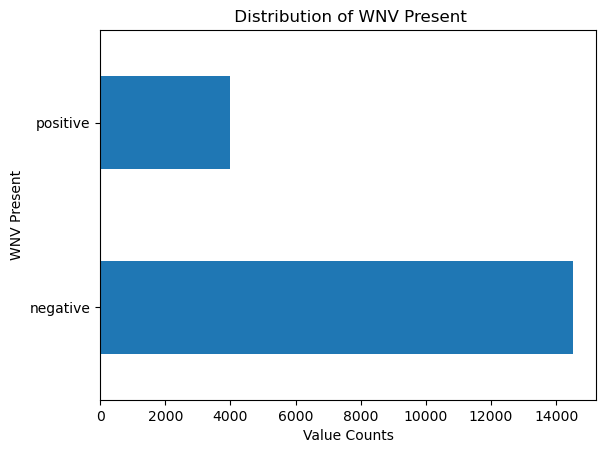

In [15]:
# PLotting values of WNV Present
plt.figure()
df['WNV Present'].value_counts().plot(kind='barh',xlabel='Value Counts',title=' Distribution of WNV Present')
plt.show()

In [16]:
# We have two two types negative and positive, assigning positive to one and negative to zero
df['WNV Present']=df['WNV Present'].map({"negative":0, "positive" :1})

In [17]:
df.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9


In [18]:
df['Trap type'].value_counts() # Estimating categories of Trap type

Trap type
GRAVID      17741
CDC           544
SENTINEL      209
OVI             1
Name: count, dtype: int64

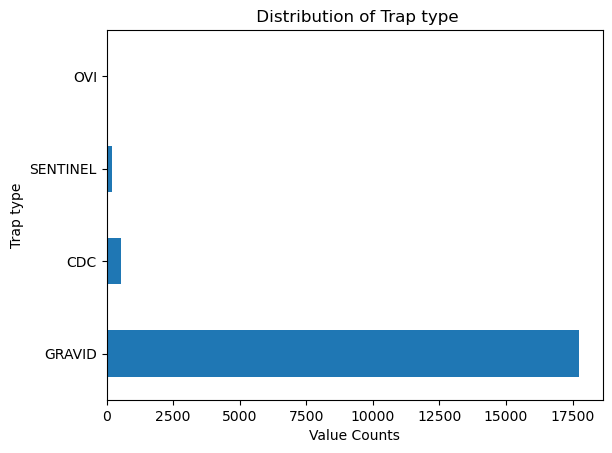

In [19]:
# PLotting the four categories of Trap type
plt.figure()
df['Trap type'].value_counts().plot(kind='barh', xlabel='Value Counts',title=' Distribution of Trap type')
plt.show()

Since, there are multiple trap types we can use one-hot encoding for this.We are Converting Trap type column into four columns based on the four trap types OVI, SENTINEL, CDC, GRAVID types, we drop one column CDC (because of multicolinearity) and change the datatype of the columns to integer instead of boolean

In [21]:
# Converting to dummy variables
df=pd.get_dummies(df, columns=['Trap type'], drop_first=True, dtype=int)

In [22]:
df.head()

,Year,Week,Address Block,Trap,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month,Trap type_GRAVID,Trap type_OVI,Trap type_SENTINEL
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9,1,0,0
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9,1,0,0
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9,1,0,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9,1,0,0
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9,1,0,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Year                18495 non-null  int64         
 1   Week                18495 non-null  int64         
 2   Address Block       18495 non-null  object        
 3   Trap                18495 non-null  object        
 4   Date                18495 non-null  datetime64[ns]
 5   Mosquito number     18495 non-null  int64         
 6   WNV Present         18495 non-null  int64         
 7   Species             18495 non-null  object        
 8   Lat                 18495 non-null  float64       
 9   Lon                 18495 non-null  float64       
 10  Month               18495 non-null  int64         
 11  Trap type_GRAVID    18495 non-null  int32         
 12  Trap type_OVI       18495 non-null  int32         
 13  Trap type_SENTINEL  18495 non-null  int32     

### 1.2.What is the average number of mosquitoes for each month? What trends do you notice?

In [25]:
average_mos=df.groupby('Month')[['Mosquito number']].mean().reset_index() # Grouping by month and averaging mosquito number column to get average number of mosquitoes
average_mos.sort_values(by='Month')

,Month,Mosquito number
0,5,2.761905
1,6,10.264442
2,7,11.551879
3,8,12.111321
4,9,8.394973
5,10,5.377778


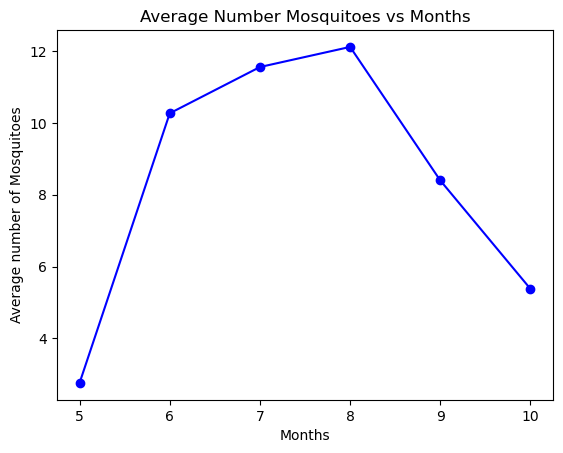

In [26]:
# Plotting the average number of mosquitoes for each month
plt.figure()
plt.plot(average_mos['Month'], average_mos['Mosquito number'], marker='o', linestyle='-', color='b')

plt.xlabel("Months")
plt.ylabel("Average number of Mosquitoes")
plt.title("Average Number Mosquitoes vs Months")

plt.show();


From the data, we can observe the following trends:
The average number of mosquitoes increases from May (#5) to August(#8), peaking in August.
There is a noticeable decline in the average number of mosquitoes in September(#9) and October(#10).
This trend suggests that mosquito populations are more abundant during the warmer months, which is typical due to favorable breeding conditions.







## <a id='toc4_'></a>  Part 2 - Statistical Analysis[&#8593;](#toc0_)



### Part 2-1. Is there a statistically significant difference between the different mosquito species when looking at the occurrence of West Nile Virus?

In [30]:
df['Species'].value_counts() # counting the number of Species of Mosquitoes

Species
CULEX RESTUANS      11866
CULEX PIPIENS        5486
CULEX TERRITANS       917
CULEX SALINARIUS      226
Name: count, dtype: int64

In [31]:
df['WNV Present'].value_counts()  # counting the WNV Present

WNV Present
0    14501
1     3994
Name: count, dtype: int64

Here we are comparing two categorical data types, so it esssential that we use the chi-square test to test this.The Chi-square test statistic measures the difference between the observed and expected frequencies. A higher value indicates a greater discrepancy between observed and expected counts

Our Hypothesis are:

**$H_0$**: There is no statistically significant difference between the different mosquito species and WNV Virus

**$H_1$**: There is a statistically significant difference between the different mosquito species and WNV Virus

In [33]:
contingency_table = pd.crosstab(df['Species'], df['WNV Present']) # Used a crosstab to illustrate  the frequency of the WNV virus presence vs Species
contingency_table

WNV Present,0,1
Species,,
CULEX PIPIENS,4074,1412
CULEX RESTUANS,9309,2557
CULEX SALINARIUS,215,11
CULEX TERRITANS,903,14


In [34]:
chi2, p, dof, expected = chi2_contingency(contingency_table) # Estimated the Chi-square test statistic

print(f'Chi-square statistic: {chi2}, p-value: {p}, Degress of Freedom:{dof}')
print(f'expected frequency array: {expected}')

Chi-square statistic: 311.10394683130164, p-value: 3.9302341764409087e-67, Degress of Freedom:3
expected frequency array: [[4301.29689105 1184.70310895]
 [9303.5342525  2562.4657475 ]
 [ 177.19524196   48.80475804]
 [ 718.97361449  198.02638551]]


The p-value here  tells us the probability of observing a Chi-square statistic Here, the  p < 0.05 , we can  reject the null hypothesis and conclude the variables are not independent (i.e., they are associated).


### 2.2.Which columns are positively correlated with the number of mosquitoes caught? Which columns are negatively correlated? Are these correlations statistically significant?

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Year                18495 non-null  int64         
 1   Week                18495 non-null  int64         
 2   Address Block       18495 non-null  object        
 3   Trap                18495 non-null  object        
 4   Date                18495 non-null  datetime64[ns]
 5   Mosquito number     18495 non-null  int64         
 6   WNV Present         18495 non-null  int64         
 7   Species             18495 non-null  object        
 8   Lat                 18495 non-null  float64       
 9   Lon                 18495 non-null  float64       
 10  Month               18495 non-null  int64         
 11  Trap type_GRAVID    18495 non-null  int32         
 12  Trap type_OVI       18495 non-null  int32         
 13  Trap type_SENTINEL  18495 non-null  int32     

In [38]:
# We also need to convert  Species from object to numerical values to better understand the influence of this on number of mosquitoes
# Converting to dummy variables
df=pd.get_dummies(df, columns=['Species'], drop_first=True, dtype=int)
df.head()

,Year,Week,Address Block,Trap,Date,Mosquito number,WNV Present,Lat,Lon,Month,Trap type_GRAVID,Trap type_OVI,Trap type_SENTINEL,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TERRITANS
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,2,0,41.977738,-87.880969,9,1,0,0,1,0,0
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,1,0,41.798211,-87.736925,9,1,0,0,1,0,0
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,2,0,41.987245,-87.689417,9,1,0,0,1,0,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,1,0,41.953664,-87.724987,9,1,0,0,1,0,0
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,9,0,41.657069,-87.546049,9,1,0,0,1,0,0


In [39]:
# Calculate all the correlations between each variables
mosquito_corr = df.corr(numeric_only=True)  # Excluding nonnumeric columns like trap, species, date and address block
mosquito_corr.style.background_gradient() # For styles for correlation matrix


,Year,Week,Mosquito number,WNV Present,Lat,Lon,Month,Trap type_GRAVID,Trap type_OVI,Trap type_SENTINEL,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TERRITANS
Year,1.000000,-0.023283,0.129326,0.153881,0.093983,-0.094628,-0.100847,0.155283,-0.011656,0.128327,0.343895,-0.066536,0.005373
Week,-0.023283,1.000000,-0.033900,0.174265,-0.002876,0.002967,0.948940,-0.047021,-0.013587,0.043002,-0.315605,-0.011918,0.036645
Mosquito number,0.129326,-0.033900,1.000000,0.408034,0.096820,-0.151421,-0.040426,-0.138275,-0.005392,0.108575,0.070999,-0.072859,-0.150962
WNV Present,0.153881,0.174265,0.408034,1.000000,0.110175,-0.163967,0.161334,-0.027359,-0.003859,0.047073,-0.001498,-0.045215,-0.111394
Lat,0.093983,-0.002876,0.096820,0.110175,1.000000,-0.749416,-0.011544,0.067916,0.001292,-0.017184,0.076660,-0.004388,-0.056925
Lon,-0.094628,0.002967,-0.151421,-0.163967,-0.749416,1.000000,0.010695,-0.081628,-0.004017,0.055548,-0.055278,-0.004243,0.078145
Month,-0.100847,0.948940,-0.040426,0.161334,-0.011544,0.010695,1.000000,-0.078398,-0.011988,0.035333,-0.327509,-0.010218,0.032683
Trap type_GRAVID,0.155283,-0.047021,-0.138275,-0.027359,0.067916,-0.081628,-0.078398,1.000000,-0.035669,-0.518582,0.098497,-0.029333,0.028193
Trap type_OVI,-0.011656,-0.013587,-0.005392,-0.003859,0.001292,-0.004017,-0.011988,-0.035669,1.000000,-0.000786,-0.009838,-0.000818,-0.001680
Trap type_SENTINEL,0.128327,0.043002,0.108575,0.047073,-0.017184,0.055548,0.035333,-0.518582,-0.000786,1.000000,0.056440,-0.007235,-0.017349


C:\Users\karni\anaconda3\envs\base_env\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


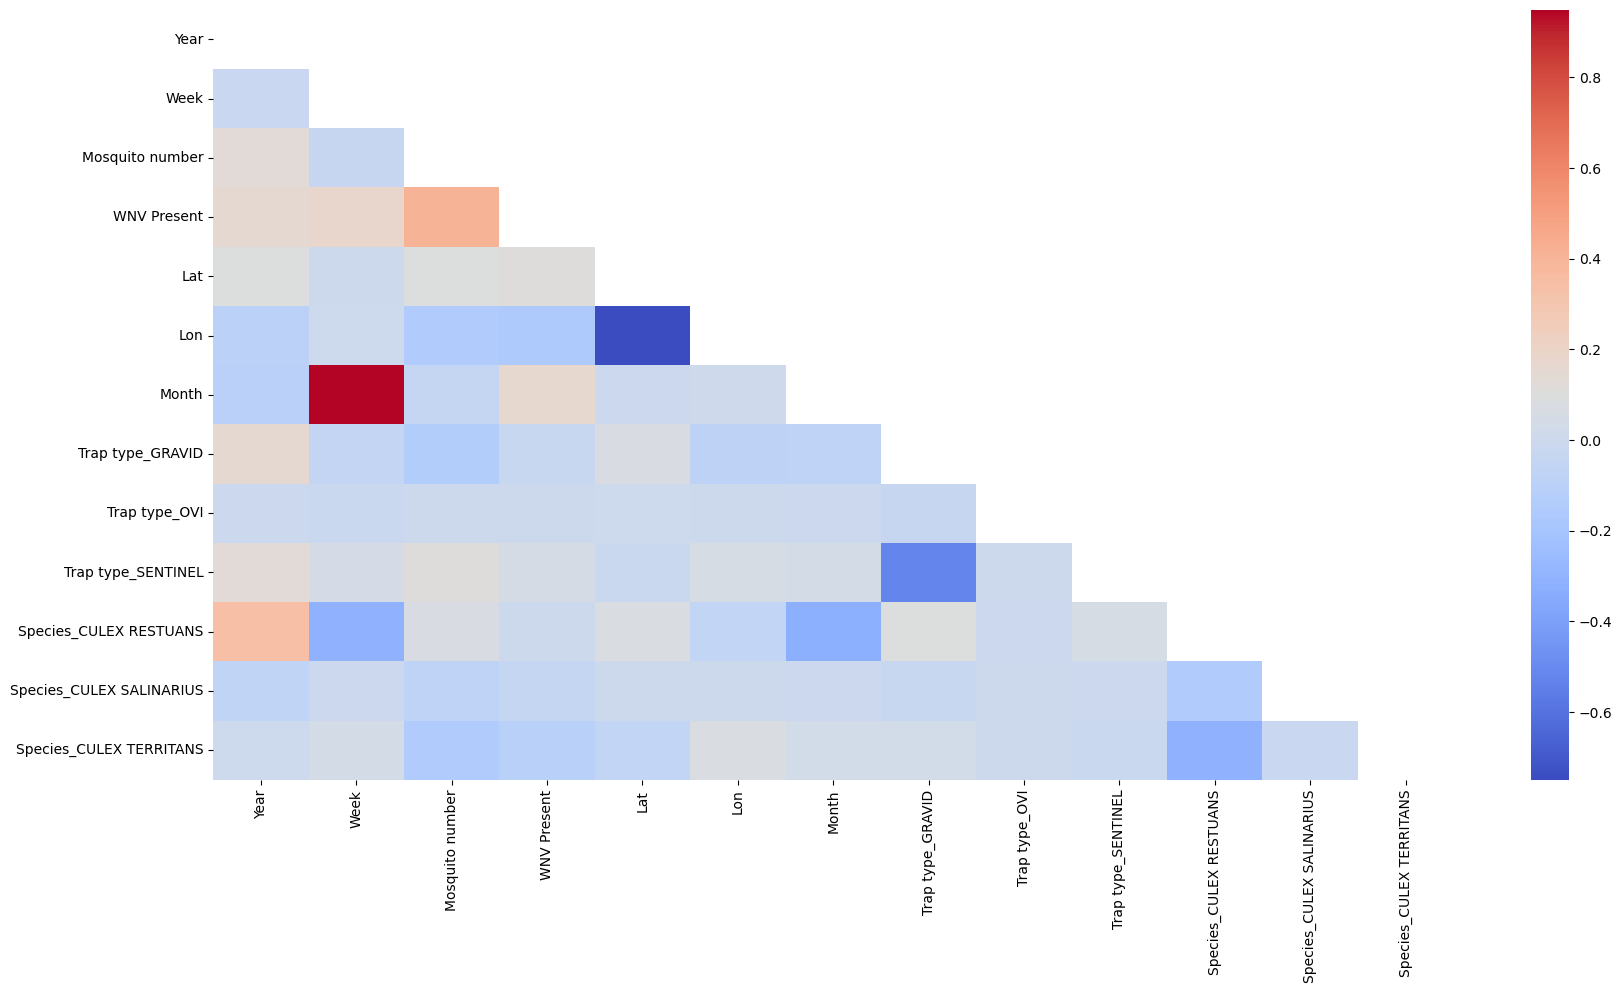

In [40]:
# Correlation of the variables in a heatmap
plt.figure(figsize=(20,10))
matrix = np.triu(mosquito_corr)
sns.heatmap(mosquito_corr, annot=True, mask=matrix, cmap='coolwarm')
plt.show()

Our goal will be to predict the `Mosquito number` column so let's focus on the other variables first and whether they are correlated.

-`Lat` and `Lon` are highly correlated ($r=-0.75$).This is a fairly strong correlation and might cause problems in our model.

-`Month` is correlated `Week`with a ($r=0.94$).  The columns contain the same information in essence.

-`Trap type_GRAVID` is mildly correlated `Trap type_SENTINEL` with a ($r=-0.51$).  

We need to drop either one of them when we do modelling as they are our independent variables and are multicollinear.


In [42]:
mosquito_corr['Mosquito number'].sort_values() # Let's only look at the correlations with number of mosquitoes caught

Lon                        -0.151421
Species_CULEX TERRITANS    -0.150962
Trap type_GRAVID           -0.138275
Species_CULEX SALINARIUS   -0.072859
Month                      -0.040426
Week                       -0.033900
Trap type_OVI              -0.005392
Species_CULEX RESTUANS      0.070999
Lat                         0.096820
Trap type_SENTINEL          0.108575
Year                        0.129326
WNV Present                 0.408034
Mosquito number             1.000000
Name: Mosquito number, dtype: float64

The columns that are  positively correlated with the number of mosquitoes caught are **Latitude**, **Trap_type_SENTINEL**,**Year**, **WNV Present** 

The columns that are negatively correlated with number of mosquitoes caught are **Longitude**, **Trap type_GRAVID**, **Month**, **Week**, **Trap type_OVI**  

Positive correlations indicate that the number of mosquitoes caught would increase with these variables and negative correlations indicate that the number of mosquitoes caught would decrease

Are these correlations statistically significant?
We can use the Pearson correlation coefficient and p-value for testing, to determine  statistically significannce

The Pearson correlation coefficient [1] measures the linear relationship between two datasets. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

In [45]:
# Pull out the X and y
X_corr = df.drop("Mosquito number", axis=1)
y_corr = df["Mosquito number"]

In [46]:
# Checking data types
X_corr.dtypes

Year                                 int64
Week                                 int64
Address Block                       object
Trap                                object
Date                        datetime64[ns]
WNV Present                          int64
Lat                                float64
Lon                                float64
Month                                int64
Trap type_GRAVID                     int32
Trap type_OVI                        int32
Trap type_SENTINEL                   int32
Species_CULEX RESTUANS               int32
Species_CULEX SALINARIUS             int32
Species_CULEX TERRITANS              int32
dtype: object

In [47]:
# We need to remove non numeric columns such as Address Block, Trap, Date, Species 
X_corr = df.drop(["Address Block",'Trap','Date'], axis=1)

In [48]:
X_corr.dtypes # Checking data types after dropping columns

Year                          int64
Week                          int64
Mosquito number               int64
WNV Present                   int64
Lat                         float64
Lon                         float64
Month                         int64
Trap type_GRAVID              int32
Trap type_OVI                 int32
Trap type_SENTINEL            int32
Species_CULEX RESTUANS        int32
Species_CULEX SALINARIUS      int32
Species_CULEX TERRITANS       int32
dtype: object

In [49]:
# Lets check for correlation significance
# Using a for loop to check whether the p-value and correlation is significant or not
for col in X_corr.columns:
    t_stat, p_val = stats.pearsonr(X_corr[col], y_corr) #function used to do correlation
    print(f"\nChecking Correlation between '{col}'and Mosquito number:")   
    print(f" Correlation Coefficient :{t_stat}\n")
    print(f" p-value: {p_val}\n")
    if p_val<0.05:  #typical threshold to see if the independent variable has significance or not      
        print(" Significant correlation\n")
    else:
        print(" Not significant\n")



Checking Correlation between 'Year'and Mosquito number:
 Correlation Coefficient :0.12932594549371082

 p-value: 8.393050016702774e-70

 Significant correlation


Checking Correlation between 'Week'and Mosquito number:
 Correlation Coefficient :-0.033899607544960506

 p-value: 4.0028248037470165e-06

 Significant correlation


Checking Correlation between 'Mosquito number'and Mosquito number:
 Correlation Coefficient :0.9999999999999898

 p-value: 0.0

 Significant correlation


Checking Correlation between 'WNV Present'and Mosquito number:
 Correlation Coefficient :0.4080343968902982

 p-value: 0.0

 Significant correlation


Checking Correlation between 'Lat'and Mosquito number:
 Correlation Coefficient :0.09681989674648857

 p-value: 9.096861337950042e-40

 Significant correlation


Checking Correlation between 'Lon'and Mosquito number:
 Correlation Coefficient :-0.15142112596890814

 p-value: 2.7656039822362863e-95

 Significant correlation


Checking Correlation between 'Month'an

All columns in the independent variables are statistically significant except for `Trap type_OVI`

## <a id='toc4_'></a>  Part 3 - Advanced Statistical Analysis[&#8593;](#toc0_)

### 3.1.Run a linear regression to determine how the independent variables affect the number of mosquitoes caught. Explain your model construction process. Analyze the model and the results and discuss the model’s limitations. This may end up being an iterative process.
Note:
You will likely see a low R^2 value, that is to be expected.
This dataset does not respond well to performing VIF analysis, so this is not required.
WNV Present must not be one of your independent variables.



There are four assumptions associated with a linear regression model:

1. **Linearity**: The relationship between the predictor and target variables to be linear.
2. **Independence/No Multicollinearity**: The predictor variables are independent of each other.
3. **Residuals** are normally distributed.**
4. **Homoscedasticity**: The variance of residual is the same for any value of X.**

`** Will be tested after modelling.`

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Year                      18495 non-null  int64         
 1   Week                      18495 non-null  int64         
 2   Address Block             18495 non-null  object        
 3   Trap                      18495 non-null  object        
 4   Date                      18495 non-null  datetime64[ns]
 5   Mosquito number           18495 non-null  int64         
 6   WNV Present               18495 non-null  int64         
 7   Lat                       18495 non-null  float64       
 8   Lon                       18495 non-null  float64       
 9   Month                     18495 non-null  int64         
 10  Trap type_GRAVID          18495 non-null  int32         
 11  Trap type_OVI             18495 non-null  int32         
 12  Trap type_SENTINEL

In [55]:
# Seprarting y variable Mosquito number and other non numeric columns from X
X=df.drop(columns=['Mosquito number','Date','Address Block','Trap'])
y=df['Mosquito number']

In [56]:
X.head()

,Year,Week,WNV Present,Lat,Lon,Month,Trap type_GRAVID,Trap type_OVI,Trap type_SENTINEL,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TERRITANS
0,2019,39,0,41.977738,-87.880969,9,1,0,0,1,0,0
1,2019,39,0,41.798211,-87.736925,9,1,0,0,1,0,0
2,2019,39,0,41.987245,-87.689417,9,1,0,0,1,0,0
3,2019,39,0,41.953664,-87.724987,9,1,0,0,1,0,0
4,2019,39,0,41.657069,-87.546049,9,1,0,0,1,0,0


**Assumption 1: Linearity**
One of the assumptions when building a linear regression model is that there is a linear relationship between the predictor variables and the target variable. Let's plot the relationship between X and y.

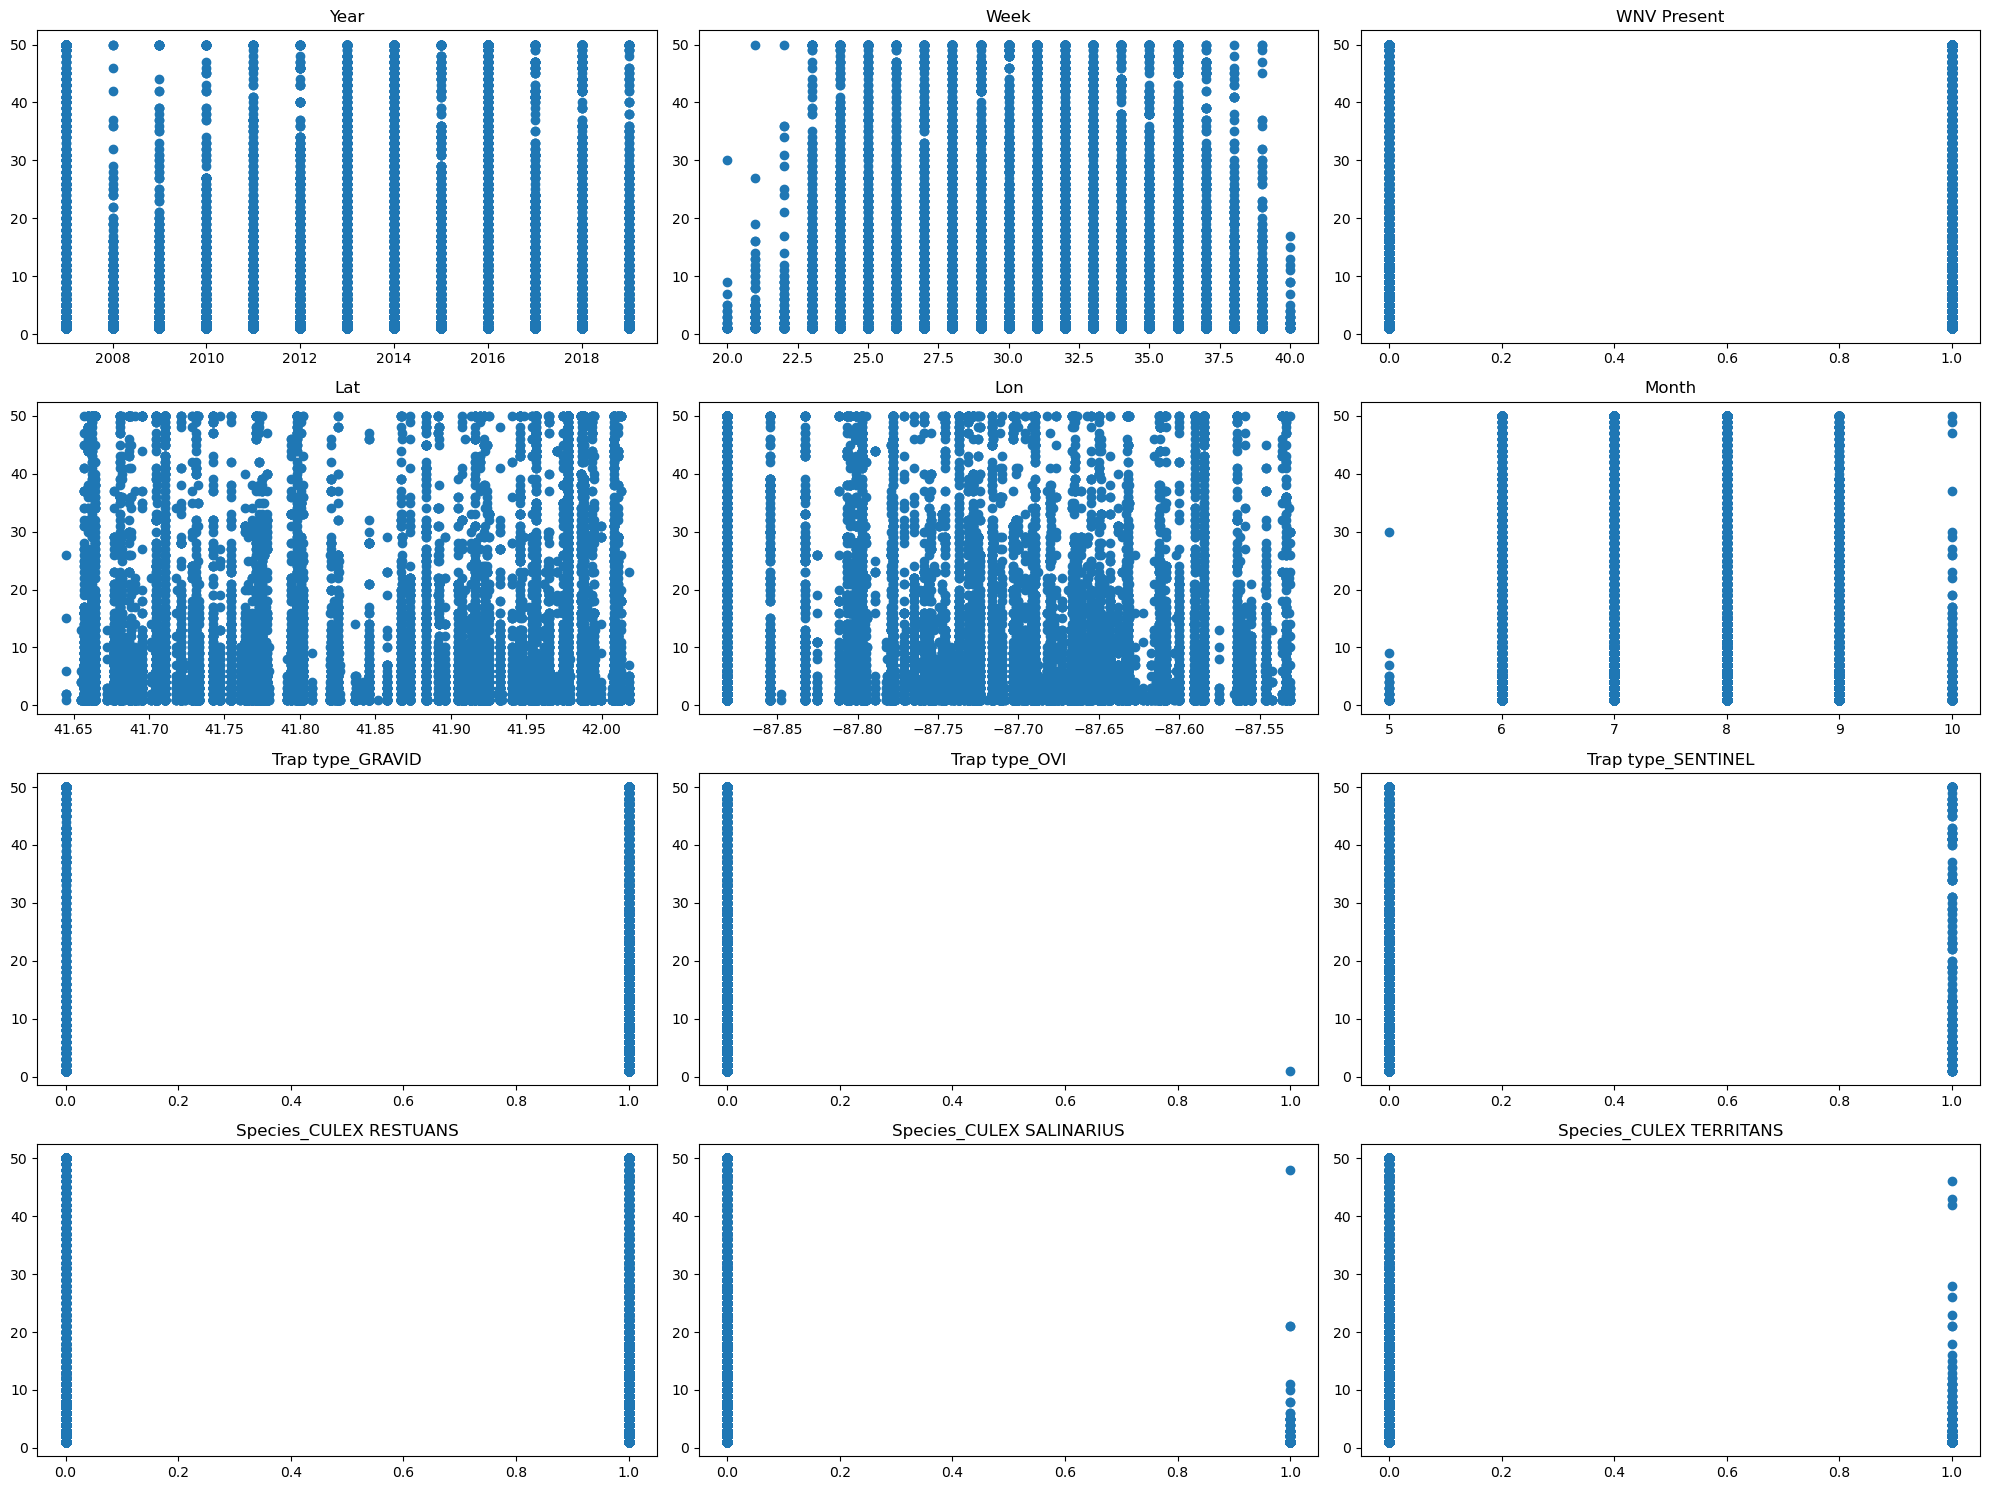

In [58]:
# Loop over the columns and plot the relationship between each column and the target
plt.subplots(4,3, figsize=(20,15))

count = 1

for col in X.columns:
    plt.subplot(4,3,count)
    plt.scatter(X[col],y)
    plt.title(col)
    
    count += 1
    
plt.tight_layout()
plt.show()

As we can see above, there seems to be no  distinct linear relationship with the target variable 'y' with any columns in 'X' 
 We need to investigate this further and cannot tell that yet.

**Assumption 2. Independence or No Multicollienearity**

Another important assumption when building a linear regression is that there is no collinearity: the predictor variables are independent of each other.

We have done this in previous Part 2 and had observed the following



-`Lat` and `Lon` are highly correlated ($r=-0.75$).This is a fairly strong correlation and might cause problems in our model.

-`Month` is correlated `Week`with a ($r=0.94$).  The columns contain the same information in essence.

-`Trap type_GRAVID` is mildly correlated `Trap type_SENTINEL` with a ($r=-0.51$).  

Lets drop Lat, Month and Trap type_SENTINEL (since, this has lower sample counts that Gravid)

In [63]:
X = X.drop(columns=['Lat','Month','Trap type_SENTINEL','WNV Present']) # Droping WNV Present as stated in the question

In [64]:
X.head()

,Year,Week,Lon,Trap type_GRAVID,Trap type_OVI,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TERRITANS
0,2019,39,-87.880969,1,0,1,0,0
1,2019,39,-87.736925,1,0,1,0,0
2,2019,39,-87.689417,1,0,1,0,0
3,2019,39,-87.724987,1,0,1,0,0
4,2019,39,-87.546049,1,0,1,0,0


In [65]:
# We have to add in our intercept manually
X_withconstant = sm.add_constant(X)
X_withconstant

,const,Year,Week,Lon,Trap type_GRAVID,Trap type_OVI,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TERRITANS
0,1.0,2019,39,-87.880969,1,0,1,0,0
1,1.0,2019,39,-87.736925,1,0,1,0,0
2,1.0,2019,39,-87.689417,1,0,1,0,0
3,1.0,2019,39,-87.724987,1,0,1,0,0
4,1.0,2019,39,-87.546049,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
18490,1.0,2016,36,-87.635858,1,0,0,0,0
18491,1.0,2007,34,-87.758403,1,0,0,0,0
18492,1.0,2016,30,-87.590176,1,0,1,0,0
18493,1.0,2017,33,-87.664758,0,0,1,0,0


Lets started building our `Model 3.1.1`, with the first iteration

In [67]:
# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a separate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     232.8
Date:                Sun, 04 May 2025   Prob (F-statistic):               0.00
Time:                        19:16:21   Log-Likelihood:                -73457.
No. Observations:               18495   AIC:                         1.469e+05
Df Residuals:                   18486   BIC:                         1.470e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -2837.3755     99.975    -28.381      0.000   -3033.336   -2641.414
Year                         0.5501      0.028     19.886      0.000       0.496       0.604
Week                        -0.1488      0.023     -6.406      0.000      -0.194      -0.103
Lon                        -20.0424      1.000    -20.037      0.000     -22.003     -18.082
Trap type_GRAVID           -11.5688      0.486    -23.787      0.000     -12.522     -10.616
Trap type_OVI              -21.3625     12.858     -1.661      0.097     -46.565       3.840
Species_CULEX RESTUANS      -1.2733      0.239     -5.326      0.000      -1.742      -0.805
Species_CULEX SALINARIUS    -9.7449      0.874    -11.149      0.000     -11.458      -8.032
Species_CULEX TERRITANS     -9.3132      0.465    -20.018      0.000     -10.225      -8.401
==============================================================================
Omnibus:                     4514.200   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8910.669
Skew:                           1.500   Prob(JB):                         0.00
Kurtosis:                       4.601   Cond. No.                     2.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Model Assessment with R<sup>2<sup/>** <br>
 
| Model   | R<sup>2<sup/>   | 
|-------------|-------|
| Model 3.1.1 | 0.091 |

The p-value for `Trap type_OVI` is extremely high, which shows there is no evidence showing this variable is statistically significant to our model.

We will drop this column and try building the next iteration of the model.

2nd iteration; `Model 3.1.2`

In [71]:
# we will drop the 'non_retail_business' variable and perform another regression
X_2 = X.drop(columns=['Trap type_OVI'])

# We have to add in our intercept manually
X_withconstant2 = sm.add_constant(X_2)

# 1. Instantiate Model
myregression2 = sm.OLS(y, X_withconstant2)

# 2. Fit Model (this returns a separate object with the parameters)
myregression_results2 = myregression.fit()

# Looking at the summary
myregression_results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Mosquito number   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     232.8
Date:                Sun, 04 May 2025   Prob (F-statistic):               0.00
Time:                        19:16:22   Log-Likelihood:                -73457.
No. Observations:               18495   AIC:                         1.469e+05
Df Residuals:                   18486   BIC:                         1.470e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -2837.3755     99.975    -28.381      0.000   -3033.336   -2641.414
Year                         0.5501      0.028     19.886      0.000       0.496       0.604
Week                        -0.1488      0.023     -6.406      0.000      -0.194      -0.103
Lon                        -20.0424      1.000    -20.037      0.000     -22.003     -18.082
Trap type_GRAVID           -11.5688      0.486    -23.787      0.000     -12.522     -10.616
Trap type_OVI              -21.3625     12.858     -1.661      0.097     -46.565       3.840
Species_CULEX RESTUANS      -1.2733      0.239     -5.326      0.000      -1.742      -0.805
Species_CULEX SALINARIUS    -9.7449      0.874    -11.149      0.000     -11.458      -8.032
Species_CULEX TERRITANS     -9.3132      0.465    -20.018      0.000     -10.225      -8.401
==============================================================================
Omnibus:                     4514.200   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8910.669
Skew:                           1.500   Prob(JB):                         0.00
Kurtosis:                       4.601   Cond. No.                     2.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Model Assessment with R<sup>2<sup/>** <br>
    
| Model   | R<sup>2<sup/>   | 
|-------------|-------|
| Model 3.1.1 | 0.091 |
| Model 3.1.2 | 0.091 |



Seems like, their is no change in our from previous case, this Model 3.1.2, gives with R^2 = 0.091, which means this model is able to explain 0.9% of the variance.

There was not much impact observed affer dropping Trap_type OVI, as it had only one sample value in the whole dataset, lets use model 3.1.2 as our best model for this case.

Now, We need to check two of the four assumptions associated with a linear regression model:


Assumtion 3: **Residuals** are normally distributed.

Assumption 4: **Homoscedasticity**: The variance of residual is the same for any value of X.


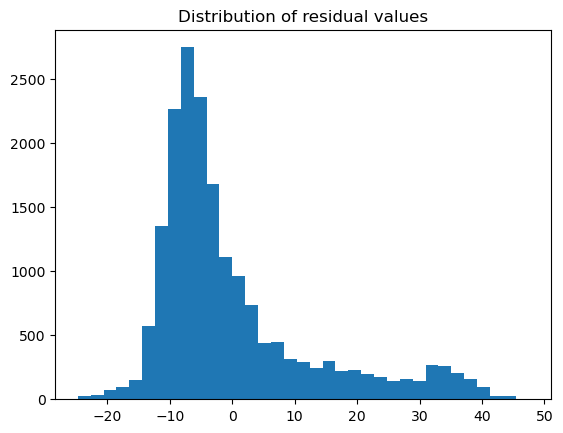

In [75]:
# Plotting the residuals of the model 3.1.2
plt.figure()
plt.hist(myregression_results2.resid, bins = 35)
plt.title('Distribution of residual values')
plt.show()

The distribution of residual values is not close to a normal distribution,it seems to be left skewed,Most of the residual values are concentrated on the left (negative values), while the tail extends towards the right (positive values). This indicates that there are more negative residuals, suggesting the presence of some larger positive residual outliers, here a  left-skewed distribution could mean that the model tends to overestimate values more frequently than it underestimates them.


We can also take  take a look at the Shaprio-Wilk test.

In [77]:
# calculating the shapiro test statisic and its p-value

print("Shapiro-Wilk Test: ", stats.shapiro(myregression_results2.resid))


Shapiro-Wilk Test:  ShapiroResult(statistic=0.82757967710495, pvalue=0.0)


C:\Users\karni\anaconda3\envs\base_env\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The null hypothesis for the Shapiro-Wilk test is that the data are normally distributed. 
Because the p-value is less than 0.05, then the null hypothesis that the data are normally distributed is rejected.

Next, lets look at normal Q-Q plot.

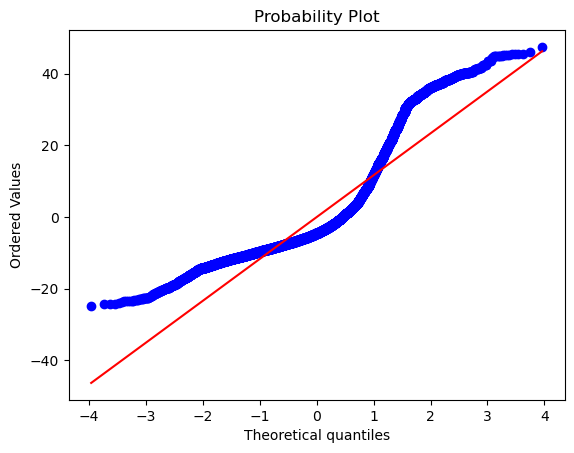

In [79]:
# Normal Q-Q plot
plt.figure()
stats.probplot(myregression_results2.resid, dist="norm", plot = plt);
plt.show()

In this plot, the points seem to deviate, particularly in the tails, which  indicate skewness, as we have seen in the residual plot from above,indicating that the distribution is not normal


Our next assumption is to check for  **Homoscedasticity**

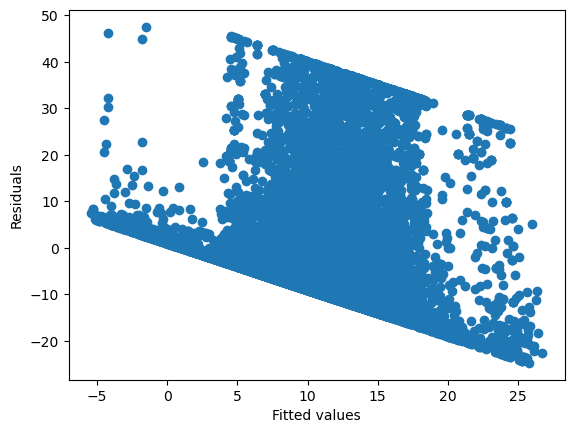

In [82]:
# Plot the residuals and the predicted values
plt.figure()
plt.scatter(myregression_results2.fittedvalues, myregression_results2.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

There seems to be a particular pattern in the plot of the residuals, the residuals do look somewhat clustered together though which might suggest that there are some outliers that affected our model. More investigation would be needed in terms of that.

-----


###  3.2.Run a logistic regression to determine how the independent variables affect West Nile Virus presence. Explain your model construction process. Analyze the model and the results and discuss the model’s limitations. This may end up being an iterative process.
### Note: Mosquito number should be one of your independent variables.

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Year                      18495 non-null  int64         
 1   Week                      18495 non-null  int64         
 2   Address Block             18495 non-null  object        
 3   Trap                      18495 non-null  object        
 4   Date                      18495 non-null  datetime64[ns]
 5   Mosquito number           18495 non-null  int64         
 6   WNV Present               18495 non-null  int64         
 7   Lat                       18495 non-null  float64       
 8   Lon                       18495 non-null  float64       
 9   Month                     18495 non-null  int64         
 10  Trap type_GRAVID          18495 non-null  int32         
 11  Trap type_OVI             18495 non-null  int32         
 12  Trap type_SENTINEL

For this new model we have;

-y variables as  `WNV Present`

-X as `Year,Week,Mosquito number, Lat, Lon, Month,Trap type_GRAVID,Trap type_OVI,Trap type_SENTINEL,Species_CULEX RESTUANS, Species_CULEX SALINARIUS Species_CULEX TERRITANS`

We need to drop Address Block, Trap and Date columns as they are not the correct data type for this anlysis

In [87]:
X_log = df.drop(columns=["WNV Present","Address Block", "Trap", "Date"])

y_log = df["WNV Present"] # Target varaible

In [88]:
X_log.head()

,Year,Week,Mosquito number,Lat,Lon,Month,Trap type_GRAVID,Trap type_OVI,Trap type_SENTINEL,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TERRITANS
0,2019,39,2,41.977738,-87.880969,9,1,0,0,1,0,0
1,2019,39,1,41.798211,-87.736925,9,1,0,0,1,0,0
2,2019,39,2,41.987245,-87.689417,9,1,0,0,1,0,0
3,2019,39,1,41.953664,-87.724987,9,1,0,0,1,0,0
4,2019,39,9,41.657069,-87.546049,9,1,0,0,1,0,0


From Part 2 for the df we observed the correrelations:

-`Lat` and `Lon` are highly correlated ($r=-0.75$).This is a fairly strong correlation and might cause problems in our model.

-`Month` is correlated `Week`with a ($r=0.94$).  The columns contain the same information in essence.

-`Trap type_GRAVID` is mildly correlated `Trap type_SENTINEL` with a ($r=-0.51$).  

We need to drop either one of them when we do modelling as they are our independent variables and are multicollinear.


In [90]:
X_log = X_log.drop(columns=["Lat","Month","Trap type_SENTINEL"])

In [91]:
X_log.head()

,Year,Week,Mosquito number,Lon,Trap type_GRAVID,Trap type_OVI,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TERRITANS
0,2019,39,2,-87.880969,1,0,1,0,0
1,2019,39,1,-87.736925,1,0,1,0,0
2,2019,39,2,-87.689417,1,0,1,0,0
3,2019,39,1,-87.724987,1,0,1,0,0
4,2019,39,9,-87.546049,1,0,1,0,0


 Let's try fitting a model and check the result.
Model 3.2.1

In [93]:

# 0. ADD THE CONSTANT!
X_with_constant = sm.add_constant(X_log)

# 1. Instantiate the model
mosquito_log_model = sm.Logit(y_log, X_with_constant)

# 2. Fit the model to the data
mosquito_log_model_fitted =  mosquito_log_model.fit()

# 3. Look at the results / summary table / assess model fit
mosquito_log_model_fitted .summary()

         Current function value: 0.405910
         Iterations: 35


C:\Users\karni\anaconda3\envs\base_env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18485
Method:                           MLE   Df Model:                            9
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2220
Time:                        19:16:24   Log-Likelihood:                -7507.3
converged:                      False   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -482.2018     22.507    -21.424      0.000    -526.315    -438.088
Year                         0.1070      0.007     16.326      0.000       0.094       0.120
Week                         0.1476      0.006     26.143      0.000       0.137       0.159
Mosquito number              0.0651      0.001     44.705      0.000       0.062       0.068
Lon                         -2.9639      0.214    -13.837      0.000      -3.384      -2.544
Trap type_GRAVID             0.2228      0.105      2.122      0.034       0.017       0.428
Trap type_OVI              -13.7347   6886.911     -0.002      0.998   -1.35e+04    1.35e+04
Species_CULEX RESTUANS      -0.2588      0.051     -5.060      0.000      -0.359      -0.159
Species_CULEX SALINARIUS    -1.0024      0.322     -3.112      0.002      -1.634      -0.371
Species_CULEX TERRITANS     -2.4946      0.274     -9.090      0.000      -3.033      -1.957
============================================================================================
"""

This model seems to not converege, lets try another iteration, in  which we will drop `Trap type_OVI`
As we have seen that the p-value for  is very large (~0.998).

In [95]:
X_log = X_log.drop(columns=['Trap type_OVI'])

`Model 3.2.2`

In [97]:

# 0. ADD THE CONSTANT!
X_with_constant = sm.add_constant(X_log)

# 1. Instantiate the model
mosquito_log_model2 = sm.Logit(y_log, X_with_constant)

# 2. Fit the model to the data
mosquito_log_model_fitted2 =  mosquito_log_model2.fit()

# 3. Look at the results / summary table / assess model fit
mosquito_log_model_fitted2.summary()

Optimization terminated successfully.
         Current function value: 0.405911
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18486
Method:                           MLE   Df Model:                            8
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.2220
Time:                        19:16:25   Log-Likelihood:                -7507.3
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -482.1972     22.507    -21.424      0.000    -526.311    -438.083
Year                         0.1070      0.007     16.326      0.000       0.094       0.120
Week                         0.1476      0.006     26.146      0.000       0.137       0.159
Mosquito number              0.0651      0.001     44.707      0.000       0.062       0.068
Lon                         -2.9638      0.214    -13.837      0.000      -3.384      -2.544
Trap type_GRAVID             0.2230      0.105      2.124      0.034       0.017       0.429
Species_CULEX RESTUANS      -0.2587      0.051     -5.059      0.000      -0.359      -0.158
Species_CULEX SALINARIUS    -1.0023      0.322     -3.112      0.002      -1.634      -0.371
Species_CULEX TERRITANS     -2.4946      0.274     -9.090      0.000      -3.032      -1.957
============================================================================================
"""

The model convereged and we have all significant p-values so we can stop the iterations here The model shows Pseudo R-squ.:	0.2205, which is quiet low. 

In [99]:
coeffs_df = pd.DataFrame(
    data={"coef": mosquito_log_model_fitted2.params, "odds_ratio": np.exp(mosquito_log_model_fitted2.params)}
)
display(coeffs_df) # Displaying coeffiencts and odd ratios

,coef,odds_ratio
const,-482.197152,3.840940e-210
Year,0.106967,1.112897e+00
Week,0.147613,1.159065e+00
Mosquito number,0.065065,1.067228e+00
Lon,-2.963773,5.162379e-02
Trap type_GRAVID,0.222967,1.249779e+00
Species_CULEX RESTUANS,-0.258726,7.720345e-01
Species_CULEX SALINARIUS,-1.002299,3.670345e-01
Species_CULEX TERRITANS,-2.494617,8.252808e-02


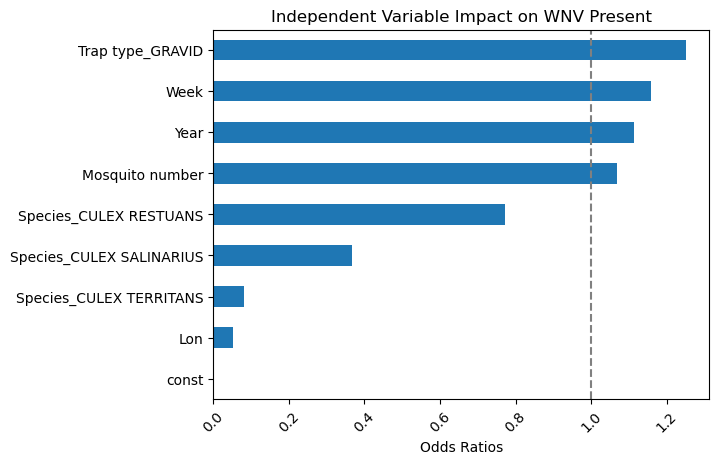

In [100]:
coeffs_df["odds_ratio"].sort_values().plot(kind="barh")

plt.axvline(x=1, c="gray", linestyle="--")
plt.xticks(rotation=45)
plt.xlabel("Odds Ratios")
plt.title("Independent Variable Impact on WNV Present")

plt.show()

From the odd ratio, we can establish that Trap type gravid, week, year, mosiquito numbers effectively increases the odds of detecting WNV Presence
while, the other variables decrease it.

In [102]:
# Show the predicted vs WNV Present actual column
df["y_pred"] = mosquito_log_model_fitted2.predict(X_with_constant)
df[["y_pred","WNV Present"]]

,y_pred,WNV Present
0,0.519703,0
1,0.398163,0
2,0.380161,0
3,0.389716,0
4,0.387384,0
...,...,...
18490,0.264544,1
18491,0.280649,1
18492,0.413300,1
18493,0.775317,1


In [103]:
# Assign hard predictions based on the 0.5 cut value and converting boolean to int
df["Hard Predictions"]= (df['y_pred'] >= 0.5).astype(int)

In [104]:
# Display the WNV Present, ypredicted from modeeling and hard predictions
df[["y_pred","WNV Present","Hard Predictions"]]

,y_pred,WNV Present,Hard Predictions
0,0.519703,0,1
1,0.398163,0,0
2,0.380161,0,0
3,0.389716,0,0
4,0.387384,0,0
...,...,...,...
18490,0.264544,1,0
18491,0.280649,1,0
18492,0.413300,1,0
18493,0.775317,1,1


In [105]:
# Calculate the accuracy of the fitted model
acc=np.mean(df["Hard Predictions"] == df["WNV Present"]).round(2)
print(f'The accuracy of the model is {acc*100} %')


The accuracy of the model is 81.0 %


The chances of detecting a WNV presence are close to 81% based on this given dataset.In other words, 8 in 10 cases would be predicted accurately. 

The limitations of the logistic regression models are:

-Linear Decision Boundary: The linear decision boundary may limit Logistic Regression in capturing complex relationships in the data. Non-linear relationships may require more sophisticated models.As we have seen from linear regression assumption, most variables dont have a linear relationship in this dataset

-Sensitive to Outliers: While outliers impact many models, Logistic Regression can be particularly sensitive. Extreme values can skew the coefficients and influence predictions disproportionately. This also, hold true for our dataset set as seen from Part 3.1, where we looked at the distribution of variables, and noticed a skewed dataset

-Impact of Irrelevant Variables: Including irrelevant variables can lead to overfitting and decrease model interpretability. Feature selection becomes crucial to maintain model efficiency. There were many variables such as Longitude and Latitude that dont really have any relevance to the WNV Present


Reference:
https://medium.com/@skme20417/4-assumptions-and-limitations-of-logistic-regression-navigating-the-nuances-8ef249cc7a01